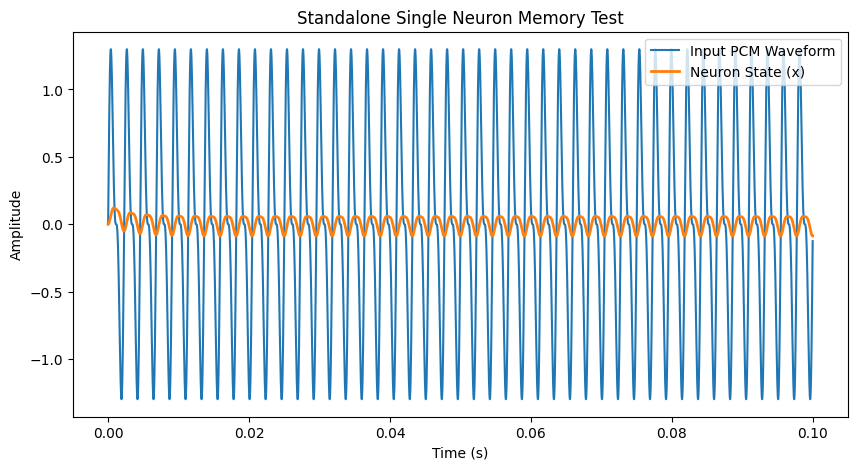

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000          # Sampling frequency (Hz)
T = 0.1             # Duration of the signal in seconds
N = int(T * fs)     # Number of time steps
dt = 1.0 / fs

# Time vector
t = np.linspace(0, T, N, endpoint=False)

# Generate a complex sinusoidal PCM waveform
# For example, a combination of two sinusoids:
f1 = 440            # Frequency of the first sinusoid (A4 note)
f2 = 880            # Frequency of the second sinusoid (an octave above)
I = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
# I is our PCM input waveform

# Define the exponential synaptic filtering parameters
tau = 0.005         # Time constant (seconds)
alpha = np.exp(-dt / tau)   # Decay factor
beta = 1.0 - alpha          # Weight for the new input

# Activation function (nonlinearity)
def sigma(x):
    return np.tanh(x)

# Initialize state and history array
x = 0.0
x_history = np.zeros(N)

# Simulation: update the neuron's state at each time step
for n in range(N):
    # Simplified update: new state is a nonlinearity applied to the decayed state plus new input
    x = sigma(alpha * x + beta * I[n])
    x_history[n] = x

# Plotting the input waveform and the neuron's state evolution
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Input PCM Waveform')
plt.plot(t, x_history, label='Neuron State (x)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Standalone Single Neuron Memory Test')
plt.legend()
plt.show()

First 10 input waveform values:
[0.         0.12545714 0.24967818 0.37144359 0.48956672 0.60290962
 0.71039811 0.81103591 0.90391764 0.98824032]

First 10 neuron state values:
[0.         0.00056897 0.00169871 0.00337554 0.00558043 0.00828921
 0.01147287 0.01509785 0.01912644 0.02351717]

Full neuron state history (truncated to first 20 for brevity):
[0.         0.00056897 0.00169871 0.00337554 0.00558043 0.00828921
 0.01147287 0.01509785 0.01912644 0.02351717 0.02822529 0.03320329
 0.03840143 0.04376836 0.04925177 0.05479905 0.06035797 0.06587744
 0.07130815 0.07660332]


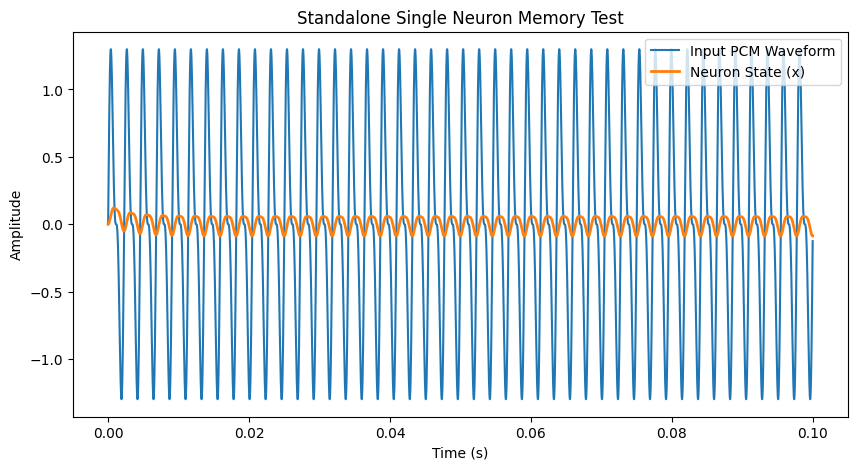

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000          # Sampling frequency (Hz)
T = 0.1             # Duration of the signal in seconds
N = int(T * fs)     # Number of time steps
dt = 1.0 / fs

# Time vector
t = np.linspace(0, T, N, endpoint=False)

# Generate a complex sinusoidal PCM waveform:
# For example, combining two sinusoids: one at 440 Hz and one at 880 Hz.
f1 = 440            # Frequency of the first sinusoid (Hz)
f2 = 880            # Frequency of the second sinusoid (Hz)
I = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Define the exponential synaptic filtering parameters
tau = 0.005         # Time constant (seconds)
alpha = np.exp(-dt / tau)   # Decay factor
beta = 1.0 - alpha          # Weight for the new input

# Define the activation function (nonlinearity)
def sigma(x):
    return np.tanh(x)

# Initialize the neuron state and a history array to capture its evolution
x = 0.0
x_history = np.zeros(N)

# Run the simulation: update the neuron's state at each time step
for n in range(N):
    x = sigma(alpha * x + beta * I[n])
    x_history[n] = x

# Print out some values to inspect the evolution:
print("First 10 input waveform values:")
print(I[:10])
print("\nFirst 10 neuron state values:")
print(x_history[:10])
print("\nFull neuron state history (truncated to first 20 for brevity):")
print(x_history[:20])

# (Optional) Plot the results. If running in a non-graphical environment, this plot may not display.
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Input PCM Waveform')
plt.plot(t, x_history, label='Neuron State (x)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Standalone Single Neuron Memory Test')
plt.legend()
plt.show()

First 15 input waveform values:
[0.         0.12545714 0.24967818 0.37144359 0.48956672 0.60290962
 0.71039811 0.81103591 0.90391764 0.98824032 0.         0.
 0.         0.         0.        ]

Neuron state values (first 20 steps):
[0.         0.00056897 0.00169871 0.00337554 0.00558043 0.00828921
 0.01147287 0.01509785 0.01912644 0.02351717 0.02340624 0.02329587
 0.02318607 0.02307682 0.02296812 0.02285997 0.02275237 0.02264532
 0.0225388  0.02243282]


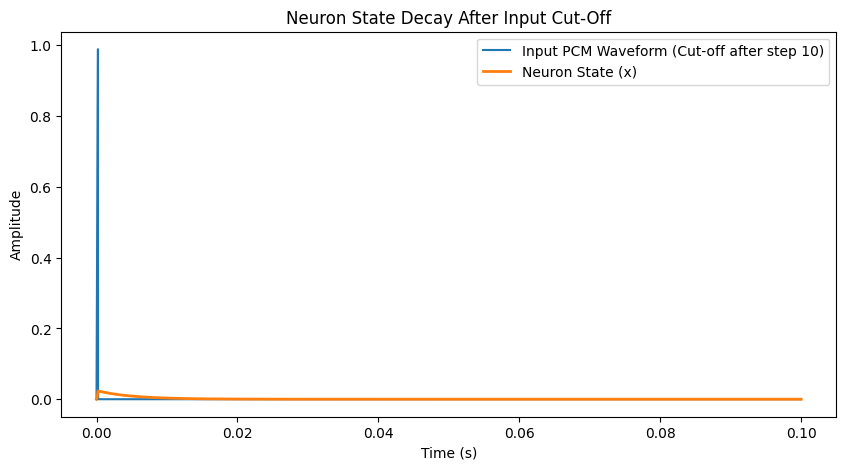

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000          # Sampling frequency (Hz)
T = 0.1             # Duration of the signal in seconds
N = int(T * fs)     # Number of time steps
dt = 1.0 / fs

# Time vector
t = np.linspace(0, T, N, endpoint=False)

# Generate a complex sinusoidal PCM waveform:
# For example, combining two sinusoids: one at 440 Hz and one at 880 Hz.
f1 = 440            # Frequency of the first sinusoid (Hz)
f2 = 880            # Frequency of the second sinusoid (Hz)
I_full = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Create input array that is active only for the first 10 time steps, then zero.
I = np.copy(I_full)
I[10:] = 0  # Cut off the input after 10 steps

# Define the exponential synaptic filtering parameters
tau = 0.005         # Time constant (seconds)
alpha = np.exp(-dt / tau)   # Decay factor
beta = 1.0 - alpha          # Weight for the new input

# Define the activation function (nonlinearity)
def sigma(x):
    return np.tanh(x)

# Initialize the neuron state and a history array to capture its evolution
x = 0.0
x_history = np.zeros(N)

# Run the simulation: update the neuron's state at each time step
for n in range(N):
    # For n >= 10, I[n] is zero, so we observe the decay
    x = sigma(alpha * x + beta * I[n])
    x_history[n] = x

# Print out some values to inspect the evolution:
print("First 15 input waveform values:")
print(I[:15])
print("\nNeuron state values (first 20 steps):")
print(x_history[:20])

# Plot the input waveform and the neuron's state evolution
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Input PCM Waveform (Cut-off after step 10)')
plt.plot(t, x_history, label='Neuron State (x)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Neuron State Decay After Input Cut-Off')
plt.legend()
plt.show()

First 15 input waveform values:
[0.         0.62728568 1.24839089 1.85721795 2.44783362 3.0145481
 3.55199053 4.05517956 4.51958818 4.94120161 0.         0.
 0.         0.         0.        ]

Neuron state values (first 20 steps):
[0.         0.00284482 0.00849334 0.01687596 0.02789346 0.04141465
 0.05727286 0.07526134 0.09512846 0.11657367 0.11552688 0.11449862
 0.11348833 0.11249545 0.11151948 0.11055992 0.10961628 0.10868811
 0.10777498 0.10687646]


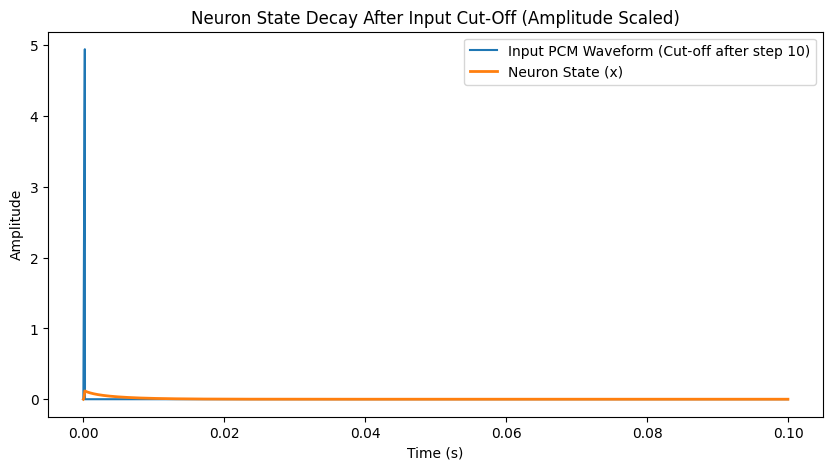

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000          # Sampling frequency (Hz)
T = 0.1             # Duration of the signal in seconds
N = int(T * fs)     # Number of time steps
dt = 1.0 / fs

# Time vector
t = np.linspace(0, T, N, endpoint=False)

# Amplitude scaling factor (e.g., PCM waveforms can go higher than 1)
amp = 5.0

# Generate a complex sinusoidal PCM waveform with higher amplitude:
f1 = 440            # Frequency of the first sinusoid (Hz)
f2 = 880            # Frequency of the second sinusoid (Hz)
I_full = amp * np.sin(2 * np.pi * f1 * t) + 0.5 * amp * np.sin(2 * np.pi * f2 * t)

# Create input array that is active only for the first 10 time steps, then zero.
I = np.copy(I_full)
I[10:] = 0  # Cut off the input after 10 steps

# Define the exponential synaptic filtering parameters
tau = 0.005         # Time constant (seconds)
alpha = np.exp(-dt / tau)   # Decay factor
beta = 1.0 - alpha          # Weight for the new input

# Define the activation function (nonlinearity)
def sigma(x):
    return np.tanh(x)

# Initialize the neuron state and a history array to capture its evolution
x = 0.0
x_history = np.zeros(N)

# Run the simulation: update the neuron's state at each time step
for n in range(N):
    # For n >= 10, I[n] is zero, so we observe the decay
    x = sigma(alpha * x + beta * I[n])
    x_history[n] = x

# Print out some values to inspect the evolution:
print("First 15 input waveform values:")
print(I[:15])
print("\nNeuron state values (first 20 steps):")
print(x_history[:20])

# Plot the input waveform and the neuron's state evolution
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Input PCM Waveform (Cut-off after step 10)')
plt.plot(t, x_history, label='Neuron State (x)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Neuron State Decay After Input Cut-Off (Amplitude Scaled)')
plt.legend()
plt.show()

First 15 input waveform values:
[0.         0.000714   0.001428   0.00214199 0.00285599 0.00356999
 0.00428399 0.00499799 0.00571199 0.00642598 0.00713998 0.00785398
 0.00856798 0.00928197 0.00999597]

Neuron state values (first 20 steps):
[0.00000000e+00 3.23808210e-06 9.69956109e-06 1.93698184e-05
 3.22343015e-05 4.82785240e-05 6.74880652e-05 8.98485696e-05
 1.15345747e-04 1.43965370e-04 1.75693280e-04 2.10515377e-04
 2.48417629e-04 2.89386064e-04 3.33406776e-04 3.80465920e-04
 4.30549713e-04 4.83644434e-04 5.39736424e-04 5.98812085e-04]

Neuron state values around cutoff (steps 131000 to 131015):
[5.78658041e-05 5.76033746e-05 5.73421352e-05 5.70820805e-05
 5.68232053e-05 5.65655040e-05 5.63089715e-05 5.60536024e-05
 5.57993914e-05 5.55463334e-05 5.52944229e-05 5.50436549e-05
 5.47940242e-05 5.45455256e-05 5.42981540e-05]


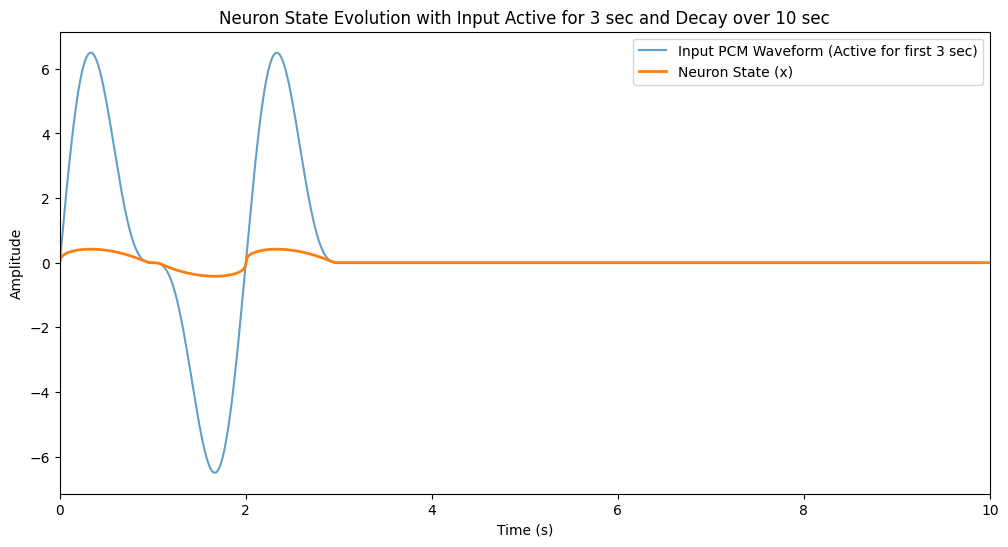

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000          # Sampling frequency (Hz)
T = 10.0            # Total duration (seconds)
N = int(T * fs)     # Number of time steps
dt = 1.0 / fs

# Time vector for 10 seconds
t = np.linspace(0, T, N, endpoint=False)

# Use lower frequencies for longer wavelengths.
# For example, f1 = 0.5 Hz and f2 = 1 Hz give periods of 2 and 1 seconds respectively.
f1 = 0.5            # Frequency of the first sinusoid (Hz)
f2 = 1.0            # Frequency of the second sinusoid (Hz)

amp = 5.0           # Amplitude scaling factor

# Generate a complex sinusoidal PCM waveform with lower frequencies:
I_full = amp * np.sin(2 * np.pi * f1 * t) + 0.5 * amp * np.sin(2 * np.pi * f2 * t)

# Create input array: active only for the first 3 seconds, then zero.
cutoff_time = 3.0   # seconds
cutoff_index = int(cutoff_time * fs)
I = np.copy(I_full)
I[cutoff_index:] = 0  # Cut off the input after 3 seconds

# Define the exponential synaptic filtering parameters
tau = 0.005       # Time constant (seconds)
alpha = np.exp(-dt / tau)
beta = 1.0 - alpha
# Define the activation function (nonlinearity)
def sigma(x):
    return np.tanh(x)

# Initialize the neuron's state and a history array to capture its evolution
x = 0.0
x_history = np.zeros(N)

# Run the simulation: update the neuron's state at each time step
for n in range(N):
    # For n >= cutoff_index, I[n] is zero, so we observe the decay.
    x = sigma(alpha * x + beta * I[n])
    x_history[n] = x

# Print out some values to inspect the evolution:
print("First 15 input waveform values:")
print(I[:15])
print("\nNeuron state values (first 20 steps):")
print(x_history[:20])
print("\nNeuron state values around cutoff (steps 131000 to 131015):")
print(x_history[cutoff_index:cutoff_index+15])

# Plot the input waveform and the neuron's state evolution
plt.figure(figsize=(12, 6))
plt.plot(t, I, label='Input PCM Waveform (Active for first 3 sec)', alpha=0.7)
plt.plot(t, x_history, label='Neuron State (x)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Neuron State Evolution with Input Active for 3 sec and Decay over 10 sec')
plt.legend()
plt.xlim(0, 10)
plt.show()

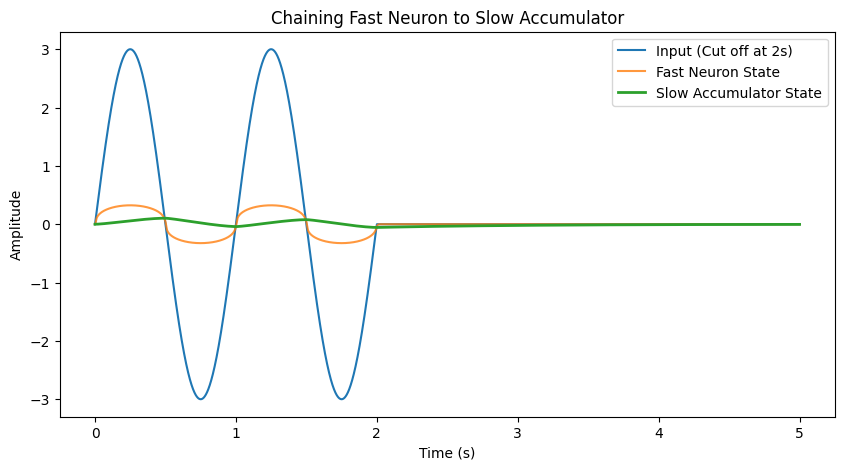

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 44000
T = 5.0
N = int(T * fs)
dt = 1.0 / fs
t = np.linspace(0, T, N, endpoint=False)

# Generate input: a sinusoid cut off at 2 seconds
cutoff_sec = 2.0
cutoff_idx = int(cutoff_sec * fs)

f = 1.0
amp = 3.0
I_full = amp * np.sin(2 * np.pi * f * t)
I = np.copy(I_full)
I[cutoff_idx:] = 0.0

# Fast neuron parameters
tau_fast = 0.005
alpha_fast = np.exp(-dt / tau_fast)
beta_fast = 1.0 - alpha_fast

# Slow accumulator parameters
# e.g., large tau or LTC closed form
tau_slow = 1.0
alpha_slow = np.exp(-dt / tau_slow)
beta_slow = 1.0 - alpha_slow

def fast_activation(x):
    return np.tanh(x)

def slow_activation(x):
    # For demonstration, keep it linear or also use tanh if you prefer
    return x

# State variables
x_fast = 0.0
x_slow = 0.0
history_fast = np.zeros(N)
history_slow = np.zeros(N)

for n in range(N):
    # 1. Fast neuron update
    x_fast = fast_activation(alpha_fast * x_fast + beta_fast * I[n])
    
    # 2. Slow aggregator (chained from fast neuron's output)
    # Here we do a simple exponential filter or a more LTC-like approach
    # For clarity, we keep the same exponential style
    # but you could replace with a closed-form LTC predictor
    x_slow = slow_activation(alpha_slow * x_slow + beta_slow * x_fast)
    
    history_fast[n] = x_fast
    history_slow[n] = x_slow

plt.figure(figsize=(10,5))
plt.plot(t, I, label="Input (Cut off at 2s)")
plt.plot(t, history_fast, label="Fast Neuron State", alpha=0.8)
plt.plot(t, history_slow, label="Slow Accumulator State", linewidth=2)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Chaining Fast Neuron to Slow Accumulator")
plt.show()

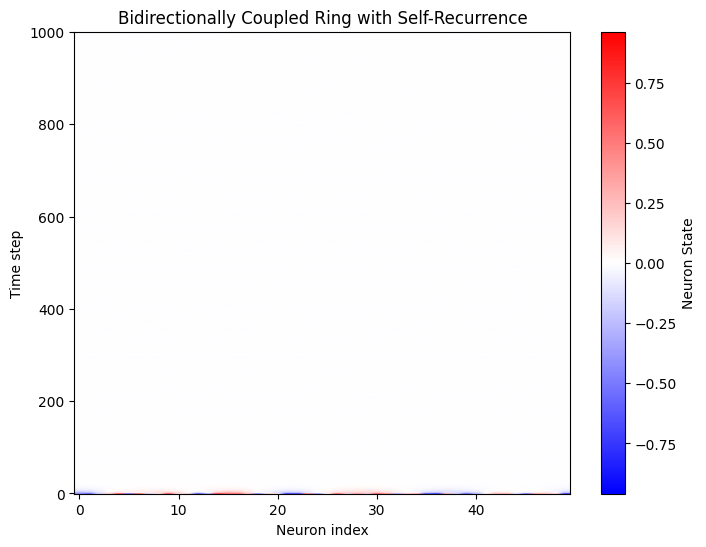

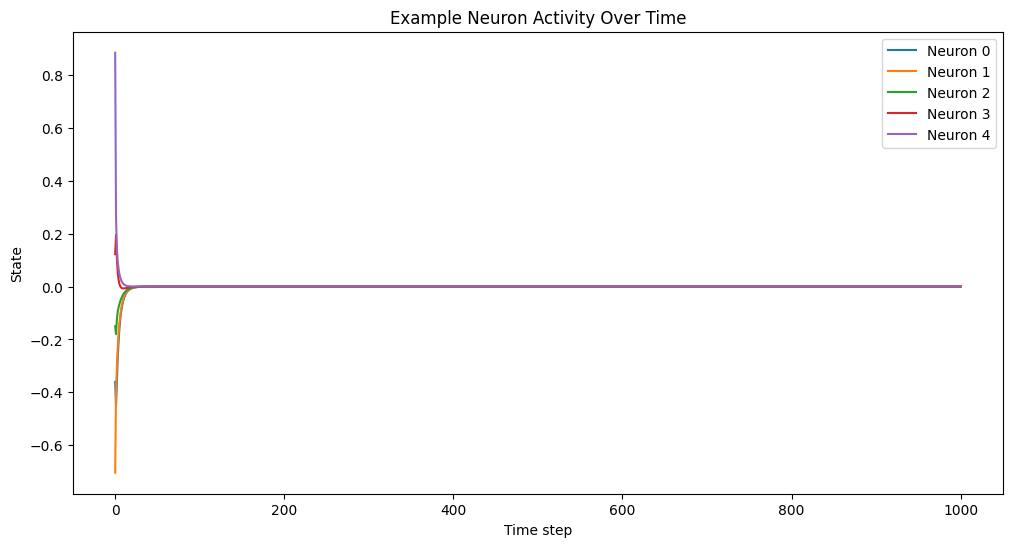

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 50             # Number of neurons arranged in a ring
T = 1000            # Number of time steps to simulate
w_self = 0.5       # Weight for self-recurrence
w_left = 0.2       # Weight for the left neighbor
w_right = 0.2      # Weight for the right neighbor
decay = 0.95       # Additional decay factor each step
activation = np.tanh

# Initialize states (e.g., random or a localized 'wave')
# shape: (T+1, N), storing the entire time evolution
states = np.zeros((T+1, N))
# For demonstration, start with a random initial state
states[0] = np.random.uniform(-1, 1, size=N)
# Optionally, try a "bump" initial condition:
# states[0, N//2 - 2 : N//2 + 3] = 1.0

def ring_index(i):
    """Utility to handle wrap-around in a ring topology."""
    return i % N

# Update rule for each time step
for t in range(T):
    new_state = np.zeros(N)
    for i in range(N):
        # Left and right neighbors in a ring
        i_left = ring_index(i - 1)
        i_right = ring_index(i + 1)
        
        # Weighted sum of self, left, right, plus global decay
        signal_in = ( w_self  * states[t, i]
                    + w_left  * states[t, i_left]
                    + w_right * states[t, i_right] )
        
        # Decay the signal a bit each step
        signal_in *= decay
        
        # Nonlinear activation (e.g., tanh)
        new_state[i] = activation(signal_in)
        
    states[t+1] = new_state

# Plot the evolution of states over time as an image
plt.figure(figsize=(8,6))
plt.imshow(states, aspect='auto', cmap='bwr', origin='lower')
plt.colorbar(label="Neuron State")
plt.xlabel("Neuron index")
plt.ylabel("Time step")
plt.title("Bidirectionally Coupled Ring with Self-Recurrence")
plt.show()

# (Optional) Plot a few neurons' time series
plt.figure(figsize=(12, 6))
for i in range(min(5, N)):
    plt.plot(states[:, i], label=f"Neuron {i}")
plt.xlabel("Time step")
plt.ylabel("State")
plt.title("Example Neuron Activity Over Time")
plt.legend()
plt.show()

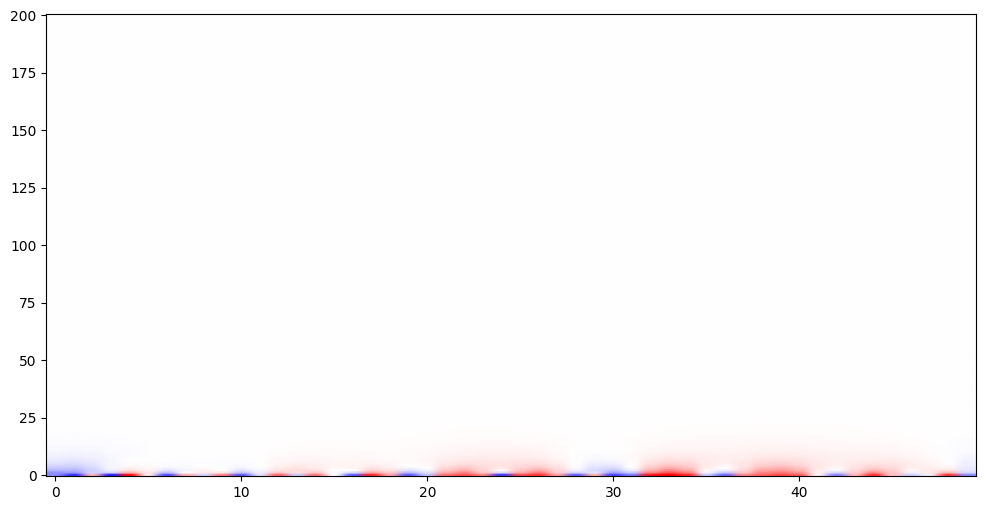

In [14]:
plt.figure(figsize=(12, 6))
plt.imshow(
    states,
    cmap='bwr',
    origin='lower',
    aspect='auto',   # Or 'equal' to enforce same scaling
    vmin=-1.0, vmax=1.0
)

In [19]:
# %% [markdown]
# # GUCE Neuron Implementation
# A wave-based neuron model integrating:
# - PCM waveform encoding
# - b-symplectic gradient flow
# - Holographic error correction
# - Theta-gamma oscillatory gating

# %% [markdown]
# ## 1. PCM Waveform Encoding

# %%
import numpy as np

class PCMWaveform:
    def __init__(self, signal, sampling_rate=44100):
        """Encode a continuous signal into PCM samples."""
        self.signal = signal
        self.sampling_rate = sampling_rate
        self.samples = self._sample()
    
    def _sample(self):
        """Sample the signal at specified intervals."""
        t = np.arange(0, len(self.signal) / self.sampling_rate, 1 / self.sampling_rate)
        return np.interp(t, np.linspace(0, 1, len(self.signal)), self.signal)
    
    def get_samples(self, n):
        """Retrieve `n` PCM samples."""
        return self.samples[:n]

# %% [markdown]
# ## 2. GUCE Neuron Core (b-Symplectic Dynamics)

# %%
class GUCE_Neuron:
    def __init__(self, state_dim, step_size=0.01, nu_0=1.0, beta=0.1):
        self.state_dim = state_dim
        self.step_size = step_size  # Learning rate
        self.nu_0 = nu_0  # Base viscosity
        self.beta = beta  # Energy scaling
        
        # Initialize skew-symmetric weights (b-symplectic structure)
        self.W = self._skew_symmetric_weights(state_dim)
        
        # State variables
        self.state = np.zeros(state_dim)
        self.energy_history = []
    
    def _skew_symmetric_weights(self, dim):
        """Create a random skew-symmetric matrix."""
        W = np.random.randn(dim, dim)
        return 0.5 * (W - W.T)
    
    def compute_viscosity(self):
        """Boltzmann-modulated viscosity based on state energy."""
        energy = np.sum(self.state ** 2)
        self.energy_history.append(energy)
        return self.nu_0 * np.exp(-self.beta * energy)
    
    def update(self, inputs):
        """b-symplectic gradient update with viscosity."""
        viscosity = self.compute_viscosity()
        
        # Compute gradient: dL/dΨ ≈ W @ Ψ + inputs
        gradient = self.W @ self.state + inputs
        
        # Update state
        self.state = self.state - self.step_size * viscosity * gradient
        
        return self.state

# %% [markdown]
# ## 3. Holographic Error Correction

# %%

class HolographicCorrector:
    def __init__(self):
        # Define mirror operations that preserve shape
        self.mirror_ops = [
            lambda x: x,               # Identity
            lambda x: np.flip(x),       # Full reverse (shape-preserving)
            lambda x: np.roll(x, 1)     # Circular shift (shape-preserving)
        ]
    
    def correct(self, state):
        """Apply mirror operators and average."""
        mirrored = [op(state) for op in self.mirror_ops]
        return np.mean(mirrored, axis=0)


# %% [markdown]
# ## 4. Theta-Gamma Observer Modulation

# %%
class Observer:
    def __init__(self, theta_freq=4.0, gamma_freq=40.0, dt=0.001):
        self.theta_phase = 0.0
        self.gamma_phase = 0.0
        self.d_theta = theta_freq * dt
        self.d_gamma = gamma_freq * dt
    
    def gate(self, signal):
        """Apply phase-modulated gating."""
        self.theta_phase += self.d_theta
        self.gamma_phase += self.d_gamma
        theta = np.sin(2 * np.pi * self.theta_phase)
        gamma = np.sin(2 * np.pi * self.gamma_phase)
        return signal * theta * gamma

# %% [markdown]
# ## 5. Integration & Test

# %%
# Generate test signal: 440 Hz sine wave (1 second)
signal = np.sin(2 * np.pi * 440 * np.linspace(0, 1, 44100))
pcm = PCMWaveform(signal, sampling_rate=44100)
samples = pcm.get_samples(1000)  # First 1000 samples

# Initialize components
neuron = GUCE_Neuron(state_dim=64)
corrector = HolographicCorrector()
observer = Observer(dt=1/44100)

# Training loop
states = []
for sample in samples:
    # Encode sample into state (simple linear projection)
    inputs = np.full(neuron.state_dim, sample)
    
    # Update neuron state
    state = neuron.update(inputs)
    
    # Apply holographic correction
    corrected_state = corrector.correct(state)
    neuron.state = corrected_state  # Feedback corrected state
    
    # Apply theta-gamma gating
    gated_output = observer.gate(corrected_state)
    states.append(gated_output)

# %% [markdown]
# ## 6. Visualization

# %%
import matplotlib.pyplot as plt

# Plot original PCM vs neuron state energy
plt.figure(figsize=(12, 4))
plt.title("PCM Signal vs Neuron Energy")
plt.plot(samples[:500], label="Original PCM")
plt.plot(neuron.energy_history[:500], label="State Energy", alpha=0.7)
plt.xlabel("Time Step")
plt.legend()
plt.show()

# Plot holographically corrected state
plt.figure(figsize=(12, 4))
plt.title("Holographically Corrected State")
plt.plot(states[100], label="Mirror-Corrected State")
plt.xlabel("State Dimension")
plt.legend()
plt.show()

# %% [markdown]
# ## 7. Validation Test
# Check if the system can reconstruct input from final state

# %%
# Reconstruct signal from neuron states
reconstructed = np.array([s.mean() for s in states])

# Compute reconstruction error
mse = np.mean((samples - reconstructed[:len(samples)]) ** 2)
print(f"Reconstruction MSE: {mse:.4f}")

# Plot original vs reconstructed
plt.figure(figsize=(12, 4))
plt.title("Original vs Reconstructed Signal")
plt.plot(samples[:200], label="Original")
plt.plot(reconstructed[:200], label="Reconstructed", linestyle="--")
plt.xlabel("Time Step")
plt.legend()
plt.show()


AttributeError: 'GUCE_Neuron' object has no attribute 'nu_0'